# Лабораторная №1

## Задание
  1) Сгенерировать выборки для разных распределений и посчитать доверительные интервалы для них. Распределения: нормальное, бернулли, пуассона, экспоненциальное.
  2) Построить ядерную оценку для `N(3, 5)` с прямоугольным и гауссовским ядром (за h принять $h_{opt}$). То же самое сделать для `uniform[3, 5]`

In [383]:
import matplotlib.pyplot as plt

# Решение
## Часть 1. Генерация выборок и доверительные интервалы

Сгенерировать выборки для разных распределений и посчитать доверительные интервалы для них. Распределения: нормальное, бернулли, пуассона, экспоненциальное.

In [188]:
from scipy.stats import bernoulli, poisson, norm, expon
from scipy.stats import t, chi2, 
from numpy import sqrt

In [178]:
alpha = 0.05

### Нормальное распределение

Выборку генерировать размера $n = 200$

За k принять $k = [log_2200] + 1 \approx 8$

In [179]:
mean = 0
std_dev = 1
n = 200
normal_sample = norm.rvs(loc=mean, scale=std_dev, size=n)

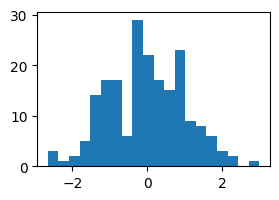

In [180]:
plt.figure(figsize=(3, 2))
plt.hist(normal_sample, bins=20)
plt.show()

#### Доверительный интервал для M

In [189]:
sample_std  = normal_sample.std()
sample_M = normal_sample.mean()

In [190]:
t_quantile = t.ppf(1 - alpha / 2, n - 1)

In [191]:
left_M =  sample_M - t_quantile  * sample_std / sqrt(n)
right_M =  sample_M + t_quantile * sample_std / sqrt(n)

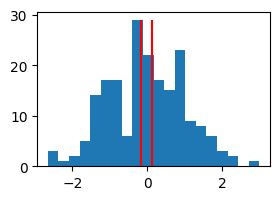

P(-0.168 <= M <= 0.121) = 0.95


In [192]:
plt.figure(figsize=(3, 2))
hist_values = plt.hist(normal_sample, bins=20)[0]
plt.vlines([left_M, right_M], ymin=0, ymax=max(hist_values), colors='red')
plt.show()

print("P({:.3f} <= M <= {:.3f}) = {}".format(left_M, right_M, 1 -alpha))

#### Доверительный интервал для $\sigma^2$

Рассчитываем критические значения хи-квадрат для нижней и верхней границ доверительного интервала

In [193]:
lower_chi_square = chi2.ppf(1 - alpha / 2, n - 1)
upper_chi_square = chi2.ppf(alpha / 2, n - 1)

Рассчитываем интервал

In [197]:
lower_limit = ((n - 1) / lower_chi_square) * sample_std**2
upper_limit = ((n - 1) / upper_chi_square) * sample_std**2

In [198]:
print("P({:.3f} <= sigma^2 <= {:.3f}) = {}".format(lower_limit, upper_limit, 1 -alpha))

P(0.886 <= sigma^2 <= 1.313) = 0.95


### Распределение Бернулли

In [201]:
p_param = 0.3
n = 200
bernoulli_sample = bernoulli.rvs(p=p_param, size=n)

In [226]:
def get_bernoulli_intervals(n, m, alpha):
    mu = norm.ppf(1-alpha/2)
    lower_limit = m/n - mu * sqrt(m * (1 - m/n) )/ n
    upper_limit = m/n + mu * sqrt(m * (1 - m/n) )/ n
    return lower_limit, upper_limit

In [234]:
m = 0.3*200
lower_limit, upper_limit = get_bernoulli_intervals(n, m, alpha)
print("P({:.3f} <= P <= {:.3f}) = {}".format(lower_limit, upper_limit, 1 -alpha))

P(0.236 <= P <= 0.364) = 0.95


Определение доверительного интервала для распределения Бернулли при малых размерах выборки

In [302]:
p_param = 0.3
n = 50
m = 0.3*n
bernoulli_sample = bernoulli.rvs(p=p_param, size=n)

In [303]:
def get_bernoulli_intervals_for_small_samples(n, m, alpha):
    mu = norm.ppf(1-alpha/2)
    lower_limit = 1/(1+(mu**2)/n) * (m/n + mu**2 / (2*n) - mu * sqrt(m/n**2 * (1-m/n) + mu**2 / (4*n**2)))
    upper_limit = 1/(1+(mu**2)/n) * (m/n + mu**2 / (2*n) + mu * sqrt(m/n**2 * (1-m/n) + mu**2 / (4*n**2)))
    return lower_limit, upper_limit

In [304]:
lower_limit, upper_limit = get_bernoulli_intervals_for_small_samples(n, m, alpha)
print("P({:.3f} <= P <= {:.3f}) = {}".format(lower_limit, upper_limit, 1 -alpha))

P(0.191 <= P <= 0.438) = 0.95


### Распределение Пуассона

In [331]:
theta = 3
n = 200
poisson_sample = poisson.rvs(mu=theta, size=n)

Доверительный интервал для $\theta$

$\theta$ одновременно равняется мат. ожиданию и дисперсии

In [332]:
sample_M = poisson_sample.mean()
mu = norm.ppf(1 - alpha / 2)

lower_limit =  sample_M - mu * sqrt(sample_M / n)
upper_limit =  sample_M + mu * sqrt(sample_M / n)

print("P({:.3f} <= M <= {:.3f}) = {}".format(lower_limit, upper_limit, 1 -alpha))

P(2.669 <= M <= 3.141) = 0.95


### Экспоненциальное распределени

In [380]:
lambda_param = 2
n = 200
exponential_sample = expon.rvs(scale=lambda_param, size=n)

Доверительный интервал для параметра $\lambda$

In [381]:
sample_M = exponential_sample.mean()
mu = norm.ppf(alpha / 2)

lower_limit =  1/sample_M - mu/sqrt(n*sample_M)
upper_limit =  1/sample_M + mu/sqrt(n*sample_M)

print("P({:.3f} <= lambda <= {:.3f}) = {}".format(1/lower_limit, 1/upper_limit, 1 -alpha))

P(1.678 <= lambda <= 2.499) = 0.95


## Часть 2. Ядерные оценки

Построить ядерную оценку для `N(3, 5)` с прямоугольным и гауссовским ядром (за h принять $h_{opt}$). То же самое сделать для `uniform[3, 5]`

In [384]:
mean = 0
std_dev = 1
n = 200
normal_sample = norm.rvs(loc=mean, scale=std_dev, size=n)

In [ ]:
sample_std = normal_sample.std()